In [3]:
import gdown
import zipfile
import pandas as pd
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Define the URL and output path
url = 'https://drive.google.com/uc?id=10BB2lPsAM8ZmOUtF0arXcseuByhZDdkn'
output_path = '/content/drive/My Drive/chicago_crime_data.zip'

# Download the file
gdown.download(url, output_path, quiet=False)

# Extract the ZIP file
zip_file_path = '/content/drive/My Drive/chicago_crime_data.zip'
extracted_folder_path = '/content/chicago_crime_data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# List the extracted files
extracted_files = os.listdir(extracted_folder_path)
csv_file_name = [file for file in extracted_files if file.endswith('.csv')][0]
csv_file_path = os.path.join(extracted_folder_path, csv_file_name)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe to verify
print(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=10BB2lPsAM8ZmOUtF0arXcseuByhZDdkn
From (redirected): https://drive.google.com/uc?id=10BB2lPsAM8ZmOUtF0arXcseuByhZDdkn&confirm=t&uuid=d643d422-6e25-4efa-b283-348cba9df8db
To: /content/drive/My Drive/chicago_crime_data.zip
100%|██████████| 508M/508M [00:09<00:00, 52.1MB/s]


         ID Case Number                    Date                      Block  \
0   5741943    HN549294  08/25/2007 09:22:18 AM         074XX N ROGERS AVE   
1     25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2     26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3  13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4  13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   

   IUCR Primary Type                                        Description  \
0  0560      ASSAULT                                             SIMPLE   
1  0110     HOMICIDE                                FIRST DEGREE MURDER   
2  0110     HOMICIDE                                FIRST DEGREE MURDER   
3  0620     BURGLARY                                     UNLAWFUL ENTRY   
4  0454      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \

In [6]:
df.head(4)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"


In [7]:
df.shape

(8077151, 22)

In [8]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

To select the necessary features and drop the unnecessary ones from the DataFrame, we need to identify which columns are essential for our analysis based on the project goals.

1.Date: Used for temporal analysis and extracting year, month, and hour.

2.Primary Type: Used for analyzing crime types and severity.

3.Arrest: Used for analyzing arrest rates.

4.Domestic: Used for comparing domestic vs. non-domestic crimes.

5.Location Description: Used for location-specific analysis.

6.Beat: Used for comparison by beat.

7.District: Used for district analysis.

8.Ward: Used for ward analysis.

9.Community Area: Used for comparison by community area.

10.Latitude: Used for geospatial analysis and crime hotspots.

11.Longitude: Used for geospatial analysis and crime hotspots.

12.Location: Used for identifying repeat crime locations.

In [9]:
# Select necessary features
selected_features = ['Date','Primary Type','Arrest','Domestic','Location Description','Beat',
    'District','Ward','Community Area','Latitude','Longitude','Location']

# Drop unnecessary features
df_selected = df[selected_features]

# Display the first few rows of the modified dataframe to verify
print(df_selected.head())

                     Date Primary Type  Arrest  Domestic Location Description  \
0  08/25/2007 09:22:18 AM      ASSAULT   False     False                OTHER   
1  05/24/2021 03:06:00 PM     HOMICIDE    True     False               STREET   
2  06/26/2021 09:24:00 AM     HOMICIDE    True     False          PARKING LOT   
3  11/09/2023 07:30:00 AM     BURGLARY   False     False            APARTMENT   
4  11/12/2023 07:59:00 AM      BATTERY    True     False   SMALL RETAIL STORE   

   Beat  District  Ward  Community Area   Latitude  Longitude  \
0  2422      24.0  49.0             1.0        NaN        NaN   
1  2515      25.0  36.0            19.0  41.917838 -87.755969   
2  1711      17.0  50.0            13.0  41.995219 -87.713355   
3  1922      19.0  47.0             5.0  41.952345 -87.677975   
4   632       6.0   6.0            44.0  41.737751 -87.604856   

                        Location  
0                            NaN  
1  (41.917838056, -87.755968972)  
2  (41.995219444,

In [10]:
df_selected

,Date,Primary Type,Arrest,Domestic,Location Description,Beat,District,Ward,Community Area,Latitude,Longitude,Location
0,08/25/2007 09:22:18 AM,ASSAULT,False,False,OTHER,2422,24.0,49.0,1.0,NaN,NaN,NaN
1,05/24/2021 03:06:00 PM,HOMICIDE,True,False,STREET,2515,25.0,36.0,19.0,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,06/26/2021 09:24:00 AM,HOMICIDE,True,False,PARKING LOT,1711,17.0,50.0,13.0,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,11/09/2023 07:30:00 AM,BURGLARY,False,False,APARTMENT,1922,19.0,47.0,5.0,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,11/12/2023 07:59:00 AM,BATTERY,True,False,SMALL RETAIL STORE,632,6.0,6.0,44.0,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,04/18/2023 08:00:00 AM,DECEPTIVE PRACTICE,False,False,APARTMENT,1214,12.0,42.0,28.0,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,08/07/2023 06:00:00 PM,ROBBERY,False,False,SIDEWALK,634,6.0,9.0,49.0,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,06/20/2023 07:00:00 PM,MOTOR VEHICLE THEFT,False,False,STREET,1031,10.0,22.0,30.0,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,08/26/2023 12:00:00 AM,CRIMINAL DAMAGE,False,False,STREET,421,4.0,7.0,46.0,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [11]:
df_selected.dtypes

Date                     object
Primary Type             object
Arrest                     bool
Domestic                   bool
Location Description     object
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [12]:
# Convert 'Date' column to datetime
df_selected['Date'] = pd.to_datetime(df_selected['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year, month, and hour from the 'Date' column
df_selected['Year'] = df_selected['Date'].dt.year
df_selected['Month'] = df_selected['Date'].dt.month
df_selected['Hour'] = df_selected['Date'].dt.hour

# Drop the original 'Date' column if no longer needed
df_selected = df_selected.drop(columns=['Date'])

# Display the first few rows to verify
print(df_selected.head())

<ipython-input-12-3008950ab28a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-12-3008950ab28a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Year'] = df_selected['Date'].dt.year
<ipython-input-12-3008950ab28a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

  Primary Type  Arrest  Domestic Location Description  Beat  District  Ward  \
0      ASSAULT   False     False                OTHER  2422      24.0  49.0   
1     HOMICIDE    True     False               STREET  2515      25.0  36.0   
2     HOMICIDE    True     False          PARKING LOT  1711      17.0  50.0   
3     BURGLARY   False     False            APARTMENT  1922      19.0  47.0   
4      BATTERY    True     False   SMALL RETAIL STORE   632       6.0   6.0   

   Community Area   Latitude  Longitude                       Location  Year  \
0             1.0        NaN        NaN                            NaN  2007   
1            19.0  41.917838 -87.755969  (41.917838056, -87.755968972)  2021   
2            13.0  41.995219 -87.713355  (41.995219444, -87.713354912)  2021   
3             5.0  41.952345 -87.677975  (41.952345086, -87.677975059)  2023   
4            44.0  41.737751 -87.604856  (41.737750767, -87.604855911)  2023   

   Month  Hour  
0      8     9  
1      5  

In [13]:
df_selected.head()

,Primary Type,Arrest,Domestic,Location Description,Beat,District,Ward,Community Area,Latitude,Longitude,Location,Year,Month,Hour
0,ASSAULT,False,False,OTHER,2422,24.0,49.0,1.0,NaN,NaN,NaN,2007,8,9
1,HOMICIDE,True,False,STREET,2515,25.0,36.0,19.0,41.917838,-87.755969,"(41.917838056, -87.755968972)",2021,5,15
2,HOMICIDE,True,False,PARKING LOT,1711,17.0,50.0,13.0,41.995219,-87.713355,"(41.995219444, -87.713354912)",2021,6,9
3,BURGLARY,False,False,APARTMENT,1922,19.0,47.0,5.0,41.952345,-87.677975,"(41.952345086, -87.677975059)",2023,11,7
4,BATTERY,True,False,SMALL RETAIL STORE,632,6.0,6.0,44.0,41.737751,-87.604856,"(41.737750767, -87.604855911)",2023,11,7


In [14]:
df_selected.columns

Index(['Primary Type', 'Arrest', 'Domestic', 'Location Description', 'Beat',
       'District', 'Ward', 'Community Area', 'Latitude', 'Longitude',
       'Location', 'Year', 'Month', 'Hour'],
      dtype='object')

In [15]:
df_selected.drop_duplicates(inplace=True)

In [16]:
# Get unique values from the 'Primary Type' column
unique_primary_types = df_selected['Primary Type'].unique()

# Display the unique values
print(unique_primary_types)

['ASSAULT' 'HOMICIDE' 'BURGLARY' 'BATTERY' 'THEFT' 'CRIMINAL DAMAGE'
 'DECEPTIVE PRACTICE' 'CRIMINAL SEXUAL ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'MOTOR VEHICLE THEFT' 'ROBBERY'
 'SEX OFFENSE' 'OTHER OFFENSE' 'WEAPONS VIOLATION' 'STALKING'
 'CRIMINAL TRESPASS' 'PROSTITUTION' 'ARSON' 'NARCOTICS' 'KIDNAPPING'
 'CONCEALED CARRY LICENSE VIOLATION' 'INTERFERENCE WITH PUBLIC OFFICER'
 'PUBLIC PEACE VIOLATION' 'OBSCENITY' 'LIQUOR LAW VIOLATION'
 'INTIMIDATION' 'HUMAN TRAFFICKING' 'GAMBLING' 'CRIM SEXUAL ASSAULT'
 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL' 'PUBLIC INDECENCY' 'RITUALISM'
 'DOMESTIC VIOLENCE' 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']


In [17]:
unique_location_description = df_selected['Location Description'].unique()
print(unique_location_description)

['OTHER' 'STREET' 'PARKING LOT' 'APARTMENT' 'SMALL RETAIL STORE'
 'GAS STATION' 'PARKING LOT / GARAGE (NON RESIDENTIAL)'
 'RESIDENCE - GARAGE' 'RESIDENCE - PORCH / HALLWAY' 'CURRENCY EXCHANGE'
 'RESIDENCE' 'AUTO / BOAT / RV DEALERSHIP'
 'POLICE FACILITY / VEHICLE PARKING LOT' 'DEPARTMENT STORE'
 'CHA PARKING LOT / GROUNDS' 'RESTAURANT' 'GROCERY FOOD STORE'
 'APPLIANCE STORE' 'CAR WASH' 'HOSPITAL BUILDING / GROUNDS'
 'COMMERCIAL / BUSINESS OFFICE' 'SIDEWALK' 'DRIVEWAY - RESIDENTIAL'
 'OTHER (SPECIFY)' 'PARK PROPERTY' 'ALLEY' 'BANK' 'DRUG STORE'
 'VEHICLE NON-COMMERCIAL' 'RESIDENCE - YARD (FRONT / BACK)'
 'BAR OR TAVERN' 'LAKEFRONT / WATERFRONT / RIVERBANK'
 'SCHOOL - PUBLIC BUILDING' 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA'
 'NURSING / RETIREMENT HOME' 'HOTEL / MOTEL' 'CONVENIENCE STORE'
 'CTA BUS STOP' 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA'
 'GOVERNMENT BUILDING / PROPERTY' 'TAVERN / LIQUOR STORE' 'CTA PLATFORM'
 'COLLEGE / UNIVERSITY - RESIDENCE HALL'
 'AIRPORT TERMINAL 

In [18]:
df_selected.describe()

,Beat,District,Ward,Community Area,Latitude,Longitude,Year,Month,Hour
count,7.958226e+06,7.958179e+06,7.355536e+06,7.356197e+06,7.871906e+06,7.871906e+06,7.958226e+06,7.958226e+06,7.958226e+06
mean,1.185703e+03,1.130696e+01,2.274472e+01,3.744727e+01,4.184212e+01,-8.767123e+01,2.010455e+03,6.530829e+00,1.309563e+01
std,7.036499e+02,6.960482e+00,1.384731e+01,2.155806e+01,8.951792e-02,6.129852e-02,6.635292e+00,3.350959e+00,6.771125e+00
min,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,3.661945e+01,-9.168657e+01,2.001000e+03,1.000000e+00,0.000000e+00
25%,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,4.176850e+01,-8.771333e+01,2.005000e+03,4.000000e+00,9.000000e+00
50%,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,4.185573e+01,-8.766571e+01,2.009000e+03,7.000000e+00,1.400000e+01
75%,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,4.190712e+01,-8.762814e+01,2.016000e+03,9.000000e+00,1.900000e+01
max,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,4.202291e+01,-8.752453e+01,2.024000e+03,1.200000e+01,2.300000e+01


In [19]:
df_missingpercent = round((df_selected.isnull().sum()*100/len(df_selected)).sort_values(ascending=False),2)
df_missingpercent

Ward                    7.57
Community Area          7.56
Latitude                1.08
Longitude               1.08
Location                1.08
Location Description    0.16
District                0.00
Primary Type            0.00
Arrest                  0.00
Domestic                0.00
Beat                    0.00
Year                    0.00
Month                   0.00
Hour                    0.00
dtype: float64

In [20]:
# Drop all rows with missing values
df_cleaned = df_selected.dropna()

In [21]:
df_cleaned.isnull().sum()

Primary Type            0
Arrest                  0
Domestic                0
Location Description    0
Beat                    0
District                0
Ward                    0
Community Area          0
Latitude                0
Longitude               0
Location                0
Year                    0
Month                   0
Hour                    0
dtype: int64

In [22]:
df_cleaned_copy = df_cleaned.copy()

**Temporal Analysis**

Crime Trends Over Time:

To examine how the number of crimes has changed over the years, we'll plot the number of crimes per year and per month.

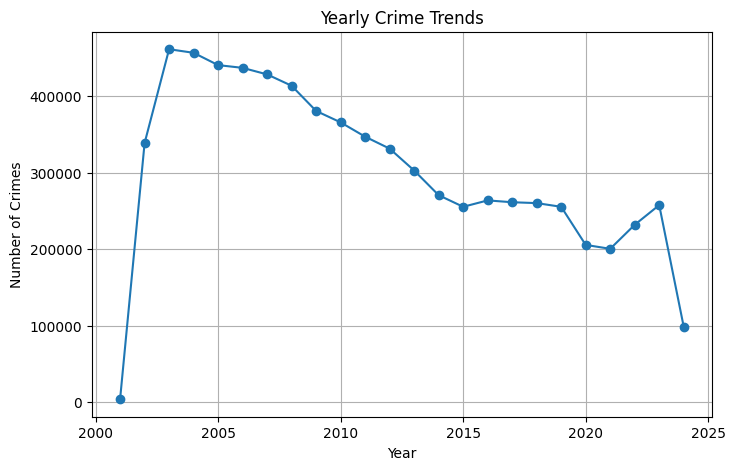

In [23]:
import matplotlib.pyplot as plt

# Yearly crime trends
yearly_crime_counts = df_cleaned_copy['Year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.plot(yearly_crime_counts.index, yearly_crime_counts.values, marker='o')
plt.title('Yearly Crime Trends')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()



**Peak Crime Hours:**

To determine the times of day when crimes are most frequently reported, we'll analyze the 'Hour' field.

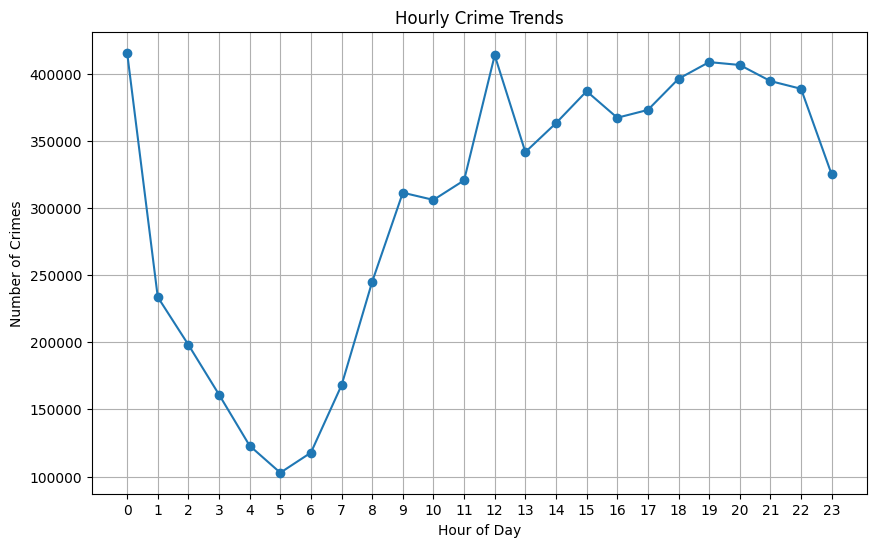

In [24]:
#  Peak Crime Hours
hourly_crime_counts = df_cleaned_copy['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(hourly_crime_counts.index, hourly_crime_counts.values, marker='o')
plt.title('Hourly Crime Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(24))
plt.grid(True)
plt.show()


**Geospatial Analysis**

Crime Hotspots:

To identify areas with high concentrations of crimes, we'll create a heatmap using latitude and longitude coordinates.

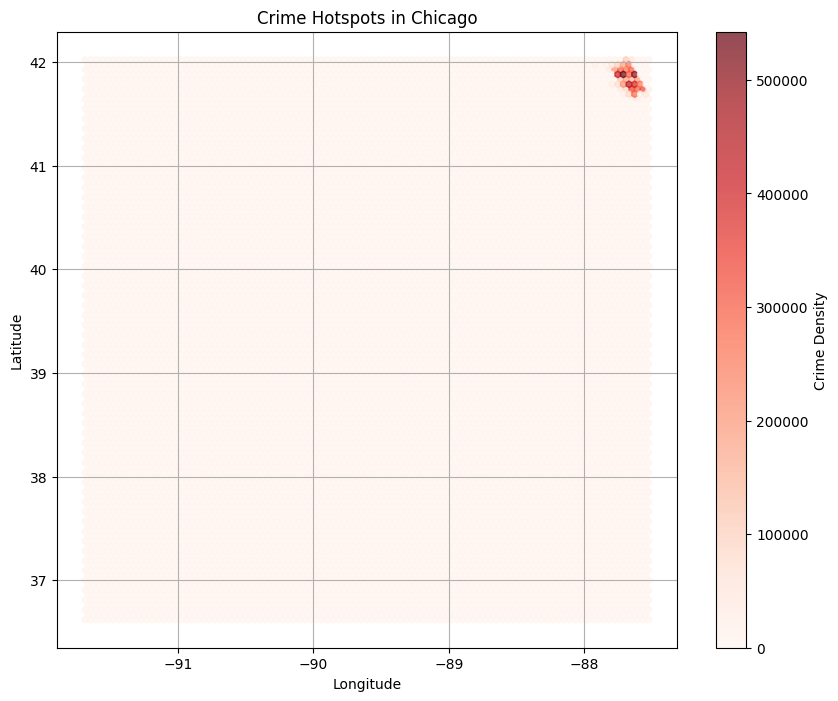

In [25]:
# Create a hexbin plot of crime hotspots
plt.figure(figsize=(10, 8))
plt.hexbin(df_cleaned_copy['Longitude'], df_cleaned_copy['Latitude'], gridsize=100, cmap='Reds', alpha=0.7)
plt.colorbar(label='Crime Density')
plt.title('Crime Hotspots in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()





**District/Ward Analysis:**

To compare crime rates across different districts and wards, we can create bar plots showing the number of crimes in each district and ward.

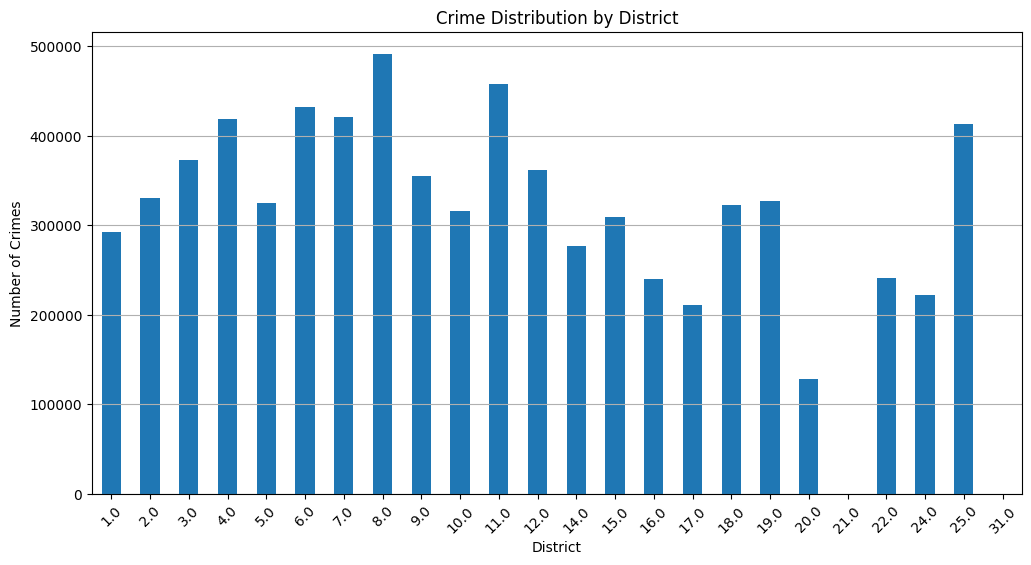

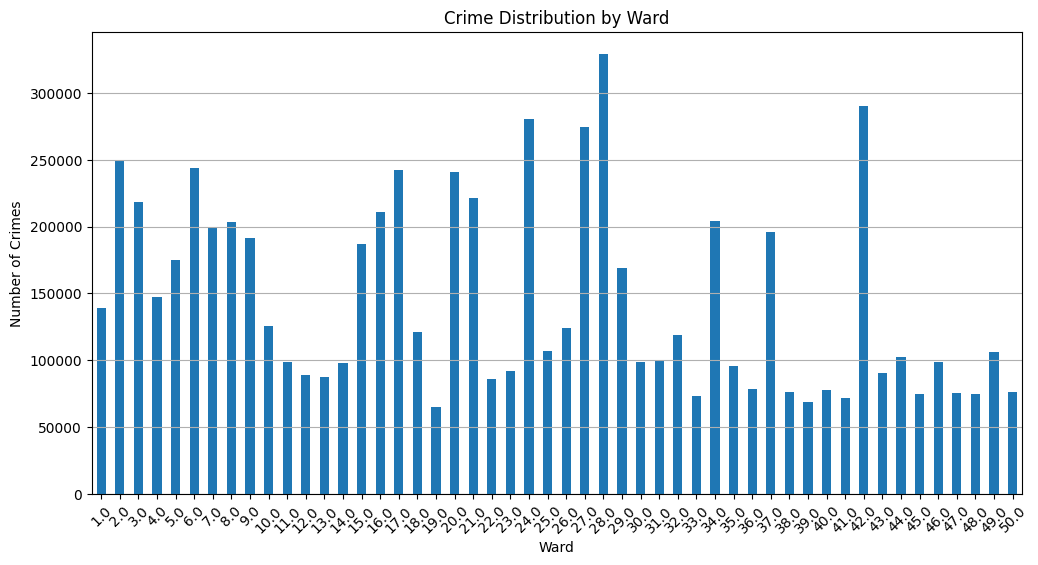

In [26]:
# District-wise crime analysis
plt.figure(figsize=(12, 6))
district_crime_counts = df_cleaned_copy['District'].value_counts().sort_index()
district_crime_counts.plot(kind='bar')
plt.title('Crime Distribution by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Ward-wise crime analysis
plt.figure(figsize=(12, 6))
ward_crime_counts = df_cleaned_copy['Ward'].value_counts().sort_index()
ward_crime_counts.plot(kind='bar')
plt.title('Crime Distribution by Ward')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Crime Type Analysis**

Distribution of Crime Types:

To analyze the frequency of different crime types, we can create a bar plot showing the distribution of primary crime types.

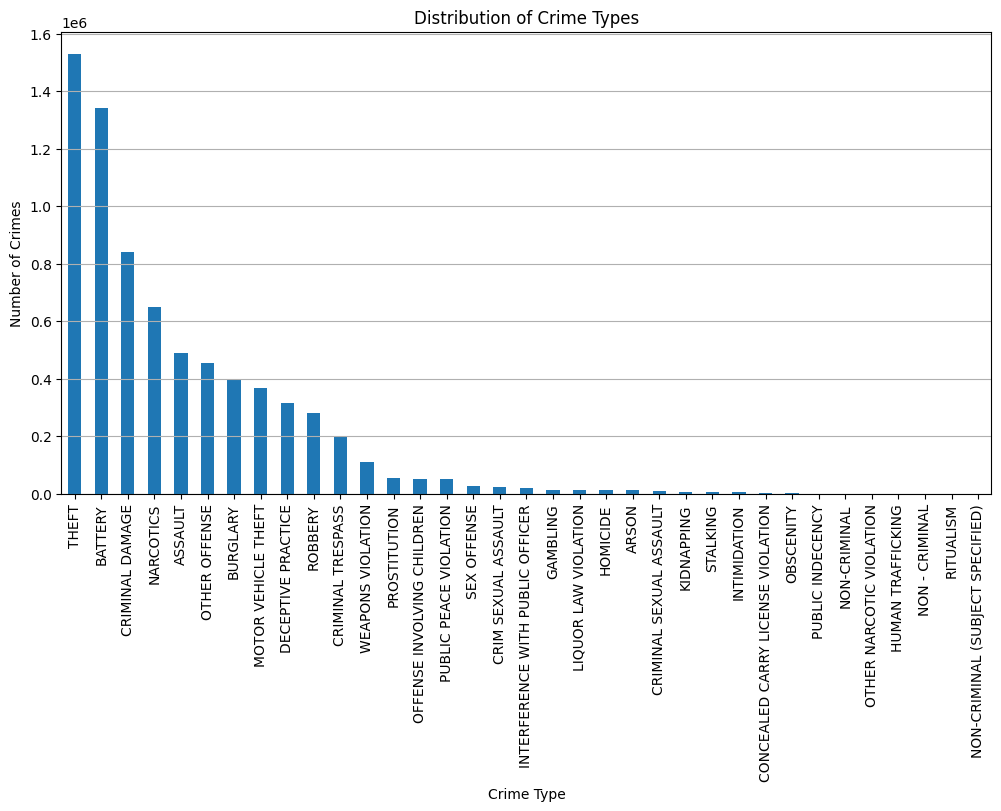

In [27]:
# Crime type distribution
plt.figure(figsize=(12, 6))
crime_type_counts = df_cleaned_copy['Primary Type'].value_counts().sort_values(ascending=False)
crime_type_counts.plot(kind='bar')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


**Severity Analysis:**

To investigate the distribution of severe crimes versus less severe crimes, we can categorize crimes into severity levels and analyze their distribution.

(Note: For simplicity, let's assume homicide, assault, and robbery as severe crimes, and theft and fraud as less severe crimes.)

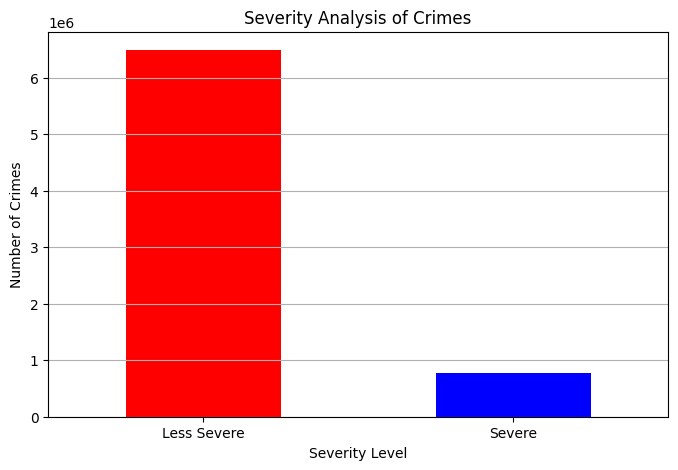

In [28]:
# Define severity levels
severe_crimes = ['HOMICIDE', 'ASSAULT', 'ROBBERY']
less_severe_crimes = ['THEFT', 'FRAUD']

# Categorize crimes into severity levels
df_cleaned_copy['Crime Severity'] = df_cleaned_copy['Primary Type'].apply(lambda x: 'Severe' if x in severe_crimes else 'Less Severe')

# Plot severity analysis
severity_counts = df_cleaned_copy['Crime Severity'].value_counts()
plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Severity Analysis of Crimes')
plt.xlabel('Severity Level')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**Arrest and Domestic Incident Analysis**

Arrest Rates:

To calculate the percentage of crimes that result in an arrest, we'll analyze the 'Arrest' column.

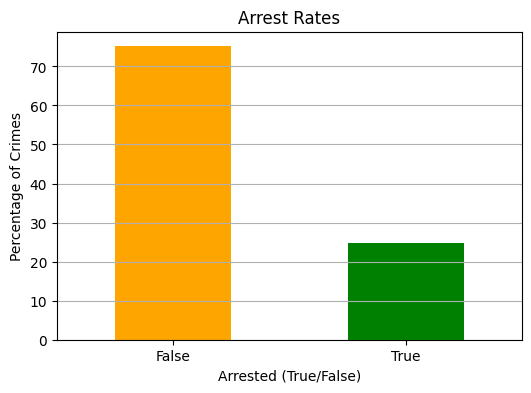

In [29]:
# Arrest rates
arrest_rates = df_cleaned_copy['Arrest'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
arrest_rates.plot(kind='bar', color=['orange', 'green'])
plt.title('Arrest Rates')
plt.xlabel('Arrested (True/False)')
plt.ylabel('Percentage of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**Domestic vs. Non-Domestic Crimes:**

To compare domestic-related incidents versus non-domestic incidents, we'll analyze the 'Domestic' column.

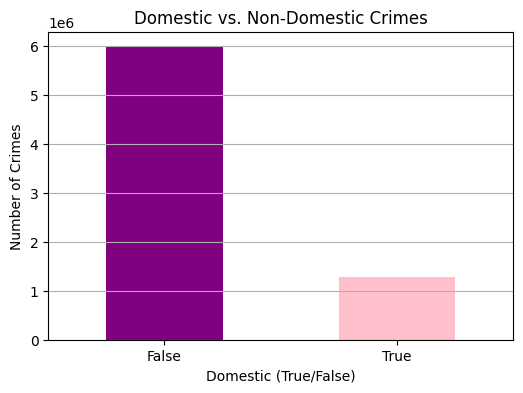

In [30]:
# Domestic vs. Non-Domestic Crimes
domestic_counts = df_cleaned_copy['Domestic'].value_counts()
plt.figure(figsize=(6, 4))
domestic_counts.plot(kind='bar', color=['purple', 'pink'])
plt.title('Domestic vs. Non-Domestic Crimes')
plt.xlabel('Domestic (True/False)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**Location-Specific Analysis**

Location Description Analysis:

To investigate the most common locations for crimes, we'll analyze the 'Location Description' column and visualize the distribution of crime types by location.

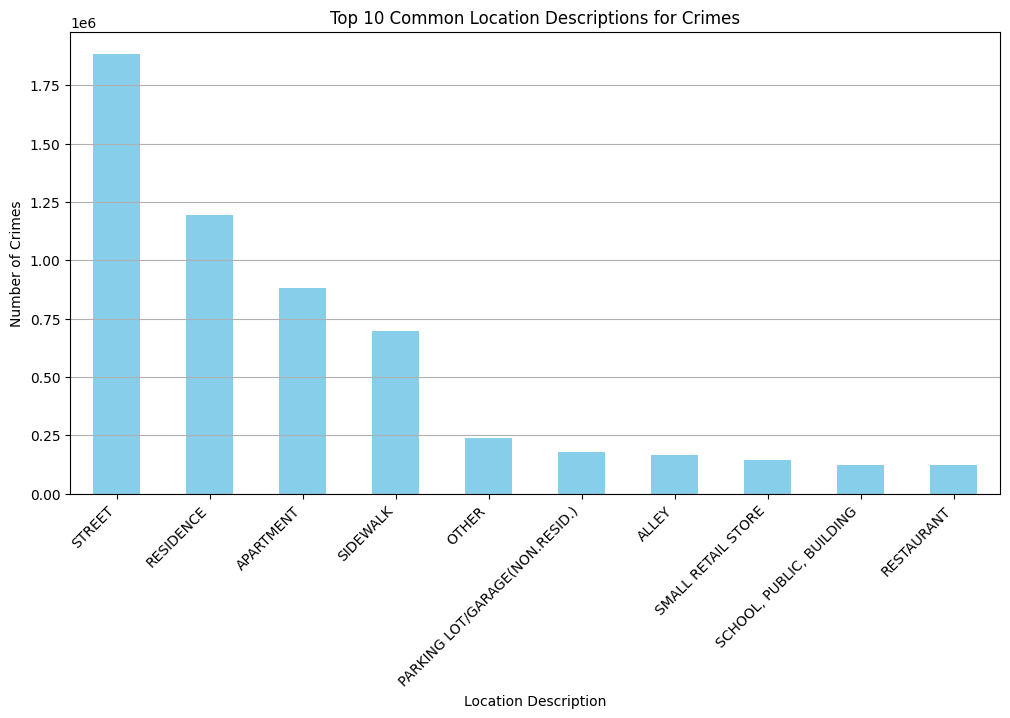

In [31]:
# Location Description Analysis
plt.figure(figsize=(12, 6))
location_counts = df_cleaned_copy['Location Description'].value_counts().head(10)
location_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Common Location Descriptions for Crimes')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


**Comparison by Beat and Community Area:**

To analyze crime data by beat and community area, we can create bar plots showing the number of crimes in each beat and community area.

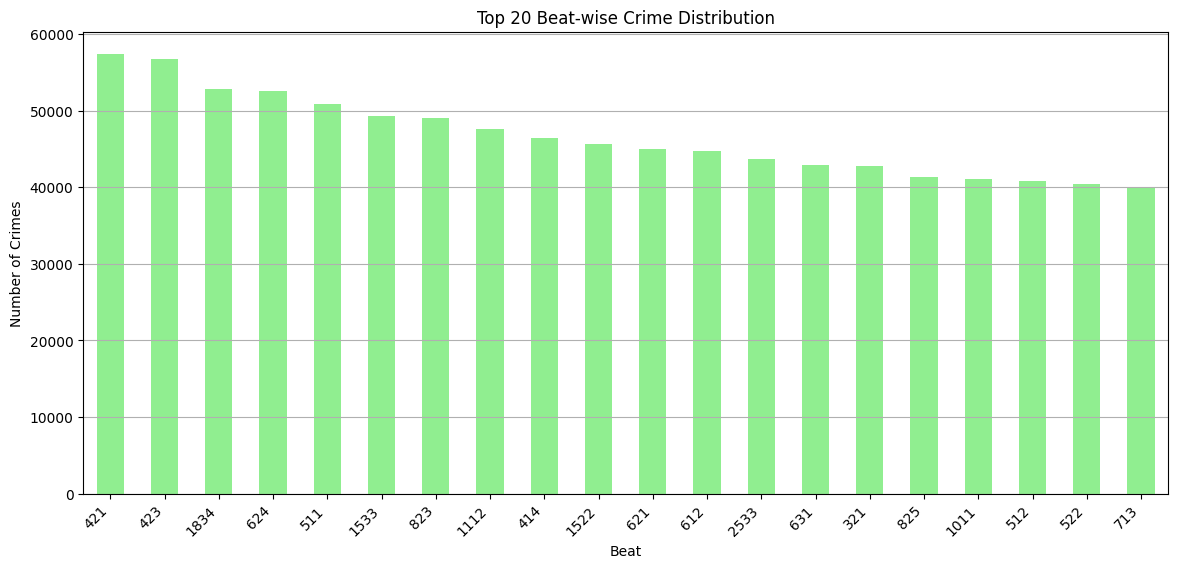

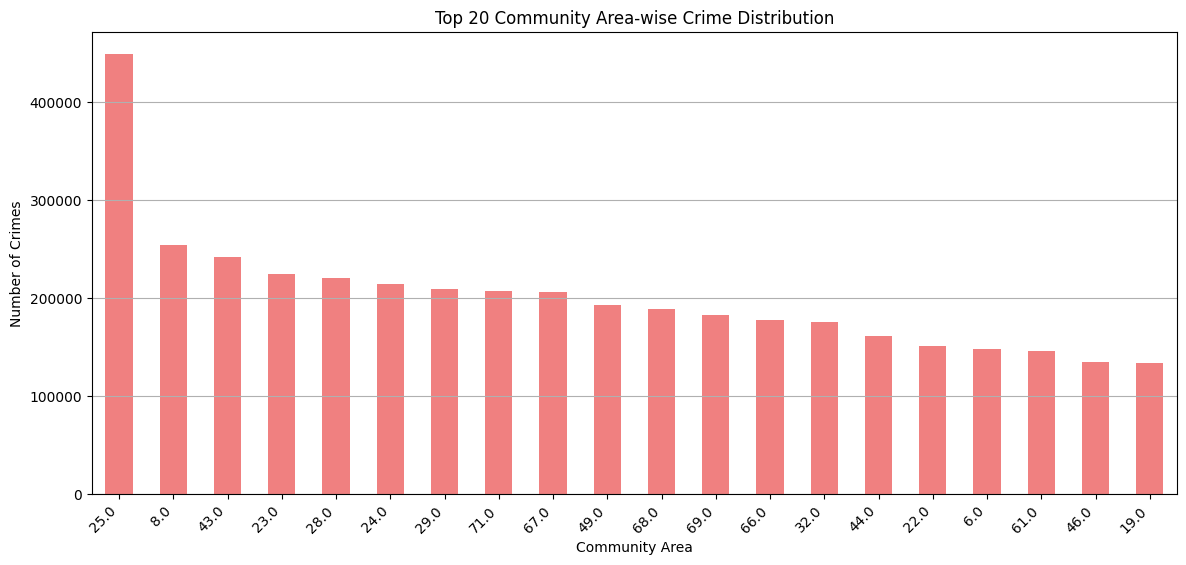

In [32]:
# Beat-wise crime analysis
plt.figure(figsize=(14, 6))
beat_crime_counts = df_cleaned_copy['Beat'].value_counts().head(20)
beat_crime_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Beat-wise Crime Distribution')
plt.xlabel('Beat')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Community Area-wise crime analysis
plt.figure(figsize=(14, 6))
community_area_crime_counts = df_cleaned_copy['Community Area'].value_counts().head(20)
community_area_crime_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 20 Community Area-wise Crime Distribution')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


**Seasonal and Weather Impact**

Seasonal Trends:

To examine whether certain types of crimes are more prevalent in specific seasons, we can analyze the distribution of crimes across different seasons.

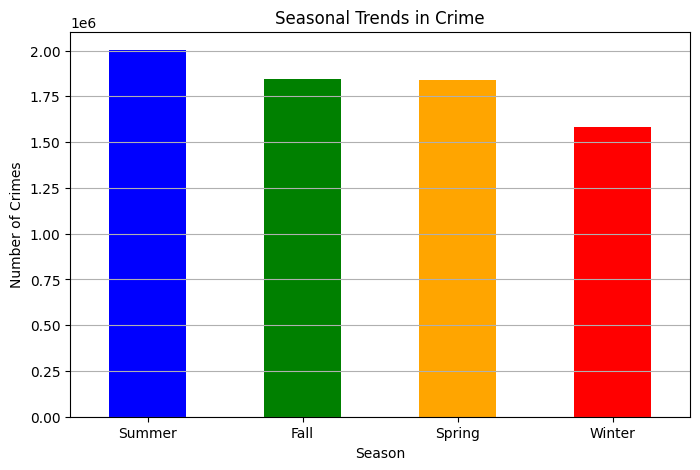

In [33]:
# Define seasons
seasons = {1: 'Winter',2: 'Winter',3: 'Spring',4: 'Spring',5: 'Spring',6: 'Summer',
           7: 'Summer',8: 'Summer',9: 'Fall',10: 'Fall', 11: 'Fall', 12: 'Winter'}

# Categorize crimes into seasons
df_cleaned_copy['Season'] = df_cleaned_copy['Month'].map(seasons)

# Plot seasonal trends
seasonal_crime_counts = df_cleaned_copy['Season'].value_counts()
plt.figure(figsize=(8, 5))
seasonal_crime_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Seasonal Trends in Crime')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**Repeat Offenders and Recidivism**

Repeat Crime Locations:

To identify locations that are repeatedly associated with criminal activity, we can analyze the distribution of crimes across different locations.

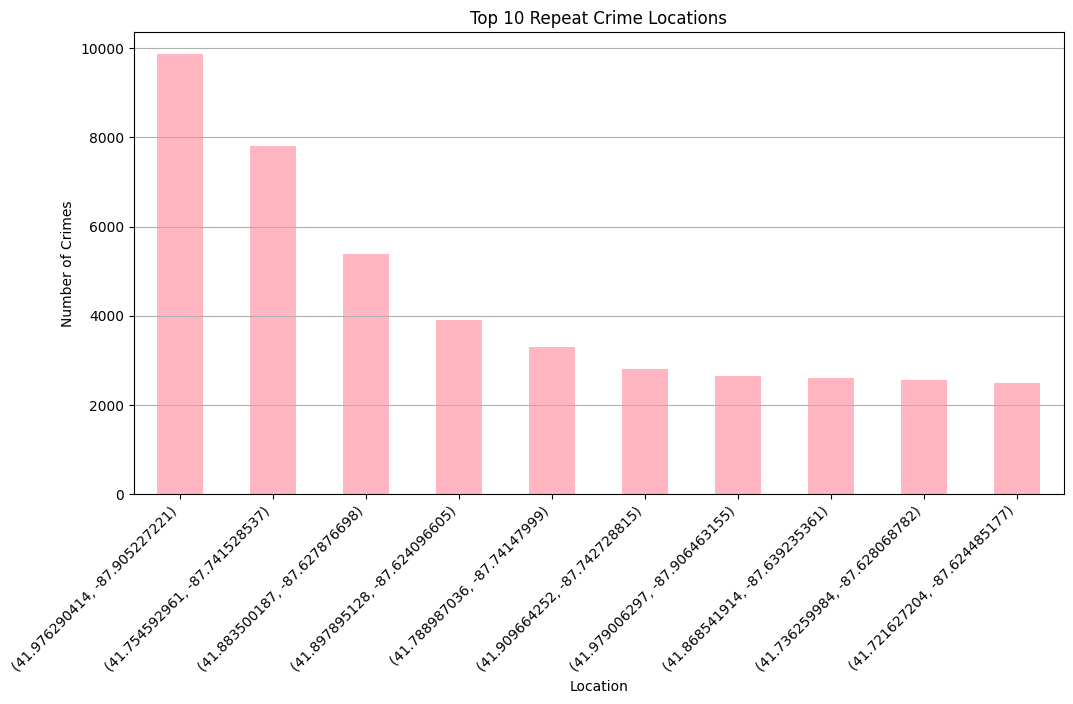

In [34]:
# Repeat Crime Locations
plt.figure(figsize=(12, 6))
repeat_location_counts = df_cleaned_copy['Location'].value_counts().head(10)
repeat_location_counts.plot(kind='bar', color='lightpink')
plt.title('Top 10 Repeat Crime Locations')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


# **Findings:**

1. **Temporal Analysis:**
    - Crime rates have fluctuated over the years, with a general downward trend in recent years.

2. **Geospatial Analysis:**
    - Crime hotspots are concentrated in certain areas of the city.

3. **District/Ward Analysis:**
    - Crime rates vary across different districts and wards.

4. **Crime Type Analysis:**
    - Theft and fraud are the most prevalent crime types, followed by assault and battery.

5. **Severity Analysis:**
    - Less severe crimes outnumber severe crimes.

6. **Arrest and Domestic Incident Analysis:**
    - A significant proportion of crimes result in arrests.
    - Domestic incidents constitute a notable portion of all crimes.

7. **Location-Specific Analysis:**
    - Certain location descriptions are associated with higher crime rates.

8. **Comparison by Beat and Community Area:**
    - Crime rates vary across different beats and community areas.

9. **Seasonal and Weather Impact:**
    - Crime rates exhibit seasonal trends, with higher rates during the summer months.

**Recommendations:**

1. **Targeted Policing:**
    - Allocate resources to areas with higher crime rates and during peak crime hours.

2. **Community-Oriented Policing:**
    - Engage with community members to address underlying factors contributing to crime.

3. **Crime Prevention Initiatives:**
    - Implement crime prevention programs in high-risk areas.

4. **Domestic Violence Support:**
    - Provide resources and support for victims of domestic violence.

5. **Environmental Design:**
    - Improve lighting and security in crime hotspots.

8. **Public Awareness:**
    - Educate the public about crime trends and safety measures.
